In [1]:
import pandas as pd
from pandas import Series
import csv
import numpy as np
import time as tm
import sklearn as sk
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from matplotlib import style

from mpl_toolkits.mplot3d import Axes3D
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Reading the csv file
test = pd.read_csv("/Users/nikitamehrotra/Downloads/python/datascience/res_purchase_card_(pcard)_fiscal_year_2014_3pcd-aiuu.csv",sep = ",")
# pd.read_csv('/Users/warriors/output1',sep = ",")

In [4]:
test

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."
5,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM..."
6,201307,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,19.87,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
7,201307,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,10.10,DAYLIGHT DONUTS,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,FAST FOOD RESTAURANTS
8,201307,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.60,UFIRST LAUNDRY SVCS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"MENS, WOMENS AND CHILDRENS UNIFORMS AND COMMER..."
9,201307,1000,OKLAHOMA STATE UNIVERSITY,McClurg,L,AT&T SERVICE PAYMENT ITM,29.99,AT&T DATA,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,TELECOMMUNICATION SERVICES


In [5]:
test.shape

(442458, 11)

In [6]:
test.last

<bound method NDFrame.last of         Year-Month  Agency Number                Agency Name  \
0           201307           1000  OKLAHOMA STATE UNIVERSITY   
1           201307           1000  OKLAHOMA STATE UNIVERSITY   
2           201307           1000  OKLAHOMA STATE UNIVERSITY   
3           201307           1000  OKLAHOMA STATE UNIVERSITY   
4           201307           1000  OKLAHOMA STATE UNIVERSITY   
5           201307           1000  OKLAHOMA STATE UNIVERSITY   
6           201307           1000  OKLAHOMA STATE UNIVERSITY   
7           201307           1000  OKLAHOMA STATE UNIVERSITY   
8           201307           1000  OKLAHOMA STATE UNIVERSITY   
9           201307           1000  OKLAHOMA STATE UNIVERSITY   
10          201307           1000  OKLAHOMA STATE UNIVERSITY   
11          201307           1000  OKLAHOMA STATE UNIVERSITY   
12          201307           1000  OKLAHOMA STATE UNIVERSITY   
13          201307           1000  OKLAHOMA STATE UNIVERSITY   
14        

In [6]:
num_of_rows = test.shape[0]
num_of_rows

274999

In [7]:
test.isnull().sum()

Year-Month                      0
Agency Number                   1
Agency Name                     1
Cardholder Last Name            1
Cardholder First Initial        1
Description                     1
Amount                          1
Vendor                          1
Transaction Date                1
Posted Date                     1
Merchant Category Code (MCC)    1
dtype: int64

In [7]:
test = test[-test.isnull().any(axis=1)]

In [8]:
test.shape

(442458, 11)

In [9]:
test.dtypes

Year-Month                        int64
Agency Number                     int64
Agency Name                      object
Cardholder Last Name             object
Cardholder First Initial         object
Description                      object
Amount                          float64
Vendor                           object
Transaction Date                 object
Posted Date                      object
Merchant Category Code (MCC)     object
dtype: object

In [10]:
test.columns
test.columns = [x.lower() for x in test.columns]
test.columns

Index(['year-month', 'agency number', 'agency name', 'cardholder last name',
       'cardholder first initial', 'description', 'amount', 'vendor',
       'transaction date', 'posted date', 'merchant category code (mcc)'],
      dtype='object')

In [13]:
test["amount"] = np.round(test["amount"])
print(np.max(test["amount"]))
print(np.min(test["amount"]))


1903858.0
-42863.0


Text(0, 0.5, 'counts')

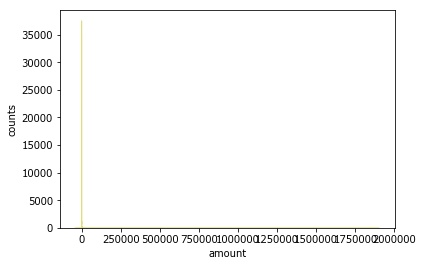

In [14]:
aa = np.floor(np.array(test['amount']))
fig = plt.figure()
toto = fig.add_subplot(1,1,1)
toto.hist(aa,color="y",alpha = 0.5,bins="auto",histtype='step')
toto.set_xlabel("amount")
toto.set_ylabel("counts")

In [15]:
test["amount"].groupby(test["amount"]).value_counts().nlargest(100)

amount  amount
20.0    20.0      14657
25.0    25.0       8748
30.0    30.0       4765
10.0    10.0       3650
12.0    12.0       3379
15.0    15.0       3357
50.0    50.0       3247
5.0     5.0        3200
40.0    40.0       3034
8.0     8.0        3000
13.0    13.0       2920
9.0     9.0        2901
83.0    83.0       2841
6.0     6.0        2783
14.0    14.0       2725
18.0    18.0       2722
29.0    29.0       2719
34.0    34.0       2708
16.0    16.0       2683
60.0    60.0       2592
24.0    24.0       2584
100.0   100.0      2544
17.0    17.0       2539
11.0    11.0       2532
35.0    35.0       2477
7.0     7.0        2454
19.0    19.0       2400
28.0    28.0       2379
22.0    22.0       2328
36.0    36.0       2259
                  ...  
99.0    99.0       1326
64.0    64.0       1297
68.0    68.0       1281
3.0     3.0        1280
81.0    81.0       1278
62.0    62.0       1255
59.0    59.0       1252
72.0    72.0       1238
85.0    85.0       1233
166.0   166.0      1223
9

In [16]:
((-300 < aa) & (aa < 1000)).sum()


404386

Text(0, 0.5, 'counts')

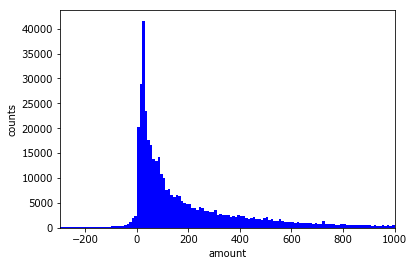

In [17]:
amount_bins = []
counter = 0
amount_bins = []
while counter < 1000:
    amount_bins.append(-300 + (counter*10))
    counter += 1
fig = plt.figure()
plt.xlim(-300,1000)
toto = fig.add_subplot(1,1,1)
toto.hist(aa,color="b",alpha = 1,bins=amount_bins)
toto.set_xlabel("amount")
toto.set_ylabel("counts")

In [18]:
test.dtypes
test["vendor"].groupby(test["vendor"]).value_counts().nlargest(5)

vendor                     vendor                   
STAPLES                    STAPLES                      14842
AMAZON MKTPLACE PMTS       AMAZON MKTPLACE PMTS         12197
WW GRAINGER                WW GRAINGER                  12076
Amazon.com                 Amazon.com                   10766
BILL WARREN OFFICE PRODUC  BILL WARREN OFFICE PRODUC     4479
Name: vendor, dtype: int64

In [19]:
test["amount"].groupby(test["vendor"]).sum().nlargest(5)

vendor
WW GRAINGER              5089386.0
PAYMENT ADJUSTMENT       4061759.0
DMI  DELL K-12/GOVT      3457500.0
DMI  DELL HIGHER EDUC    2641019.0
EMC CORPORATION          2154666.0
Name: amount, dtype: float64

In [20]:
test["amount"].groupby(test["amount"]).value_counts().nlargest(100)

amount  amount
20.0    20.0      14657
25.0    25.0       8748
30.0    30.0       4765
10.0    10.0       3650
12.0    12.0       3379
15.0    15.0       3357
50.0    50.0       3247
5.0     5.0        3200
40.0    40.0       3034
8.0     8.0        3000
13.0    13.0       2920
9.0     9.0        2901
83.0    83.0       2841
6.0     6.0        2783
14.0    14.0       2725
18.0    18.0       2722
29.0    29.0       2719
34.0    34.0       2708
16.0    16.0       2683
60.0    60.0       2592
24.0    24.0       2584
100.0   100.0      2544
17.0    17.0       2539
11.0    11.0       2532
35.0    35.0       2477
7.0     7.0        2454
19.0    19.0       2400
28.0    28.0       2379
22.0    22.0       2328
36.0    36.0       2259
                  ...  
99.0    99.0       1326
64.0    64.0       1297
68.0    68.0       1281
3.0     3.0        1280
81.0    81.0       1278
62.0    62.0       1255
59.0    59.0       1252
72.0    72.0       1238
85.0    85.0       1233
166.0   166.0      1223
9

In [21]:
testnew = test[['amount','merchant category code (mcc)', 'vendor','cardholder first initial','cardholder last name']].copy()


In [22]:
testnew["cardholdername"] = testnew["cardholder last name"] + testnew['cardholder first initial']

In [23]:
testnew.groupby(['cardholdername'])['merchant category code (mcc)'].nunique()

cardholdername
150001                     1
241002                     1
420004                     1
446004                     1
480004                     1
530005                     1
531005                     1
605006                     1
750007                     1
770007                     1
815008                     1
880008                     1
980009                     1
AARONB                     2
ACREET                    13
ADAMSC                     6
ADAMSK                    19
ADAMSS                     8
ADED                      13
ADKINSM                    1
ADMIREA                   10
ADUDDELLD                  5
AGNELLIM                  15
AKBARANB                   1
ALEXANDERD                19
ALFORDR                   10
ALINGERD                  35
ALL ABOUT TRAVEL LTD.G     5
ALL ABOUT TRAVELG         16
ALLEE-FOREMANK             9
                          ..
YoungS                     5
YoussefN                  13
YuanS                      8

In [24]:
#drop the rows with invalid names
testnew = testnew[testnew.cardholdername.apply(lambda x: x.isalpha())]

In [25]:
testnew.shape

(409131, 6)

In [26]:
testnew.groupby(['cardholdername'])['amount'].sum()

cardholdername
AARONB              1390.0
ACREET             27976.0
ADAMSC              1054.0
ADAMSK              8067.0
ADAMSS              2938.0
ADED               12354.0
ADKINSM               12.0
ADMIREA            11101.0
ADUDDELLD           8030.0
AGNELLIM           63878.0
AKBARANB             400.0
ALEXANDERD         14476.0
ALFORDR            29427.0
ALINGERD           59333.0
ALLENC             17793.0
ALLENS            117450.0
ALLENT               487.0
ALLREADJ           35108.0
ALLSJ             129496.0
ANDERSONB          12444.0
ANDERSONG           6960.0
ANDERSONR          17210.0
ANDESK             48299.0
ANGELOTTIL           220.0
ANP                 4880.0
ARBESD             16197.0
ARCAROLIP           8754.0
ARDENC            156061.0
ARGOJ               5551.0
ARMSTRONGG          4101.0
                    ...   
YoungL               525.0
YoungN             19387.0
YoungS              7012.0
YoussefN           20816.0
YuanS               5421.0
ZACCARELLIC  

In [27]:
testnew.groupby(['cardholdername'])['amount'].nunique()

cardholdername
AARONB              3
ACREET             74
ADAMSC             17
ADAMSK             34
ADAMSS             25
ADED               46
ADKINSM             1
ADMIREA            75
ADUDDELLD          12
AGNELLIM           97
AKBARANB            1
ALEXANDERD         39
ALFORDR            54
ALINGERD          221
ALLENC             70
ALLENS            268
ALLENT              8
ALLREADJ           54
ALLSJ             213
ANDERSONB          69
ANDERSONG          41
ANDERSONR          82
ANDESK            110
ANGELOTTIL          2
ANP                 5
ARBESD             66
ARCAROLIP          35
ARDENC            274
ARGOJ              17
ARMSTRONGG         16
                 ... 
YoungL              2
YoungN             79
YoungS              8
YoussefN           60
YuanS              20
ZACCARELLIC       101
ZEDEKERT           30
ZHANGG              3
ZHANGX             13
ZHAOZ              20
ZIEGENBEINJ        22
ZINKM             101
ZUNIGAL             6
ZacharyT         

In [28]:
percentile_list = pd.DataFrame(
    {'mccunique': testnew.groupby(['cardholdername'])['merchant category code (mcc)'].nunique(),
     'amount': testnew.groupby(['cardholdername'])['amount'].nunique(),
     'amountfreq': testnew.groupby(['cardholdername'])['amount'].sum()
    })

percentile_list.shape

(5042, 3)

In [29]:
x = percentile_list.ix[:,:]
s_s = StandardScaler().fit_transform(x)
tsne = TSNE(n_components=2,random_state=0)
x_tt = tsne.fit_transform(s_s)

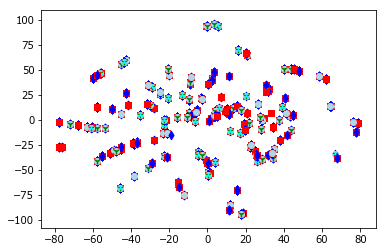

In [30]:
#Initially I am taking 5 classes
markers = ('s','d','o','1','2')
color_map = {0:'red',1:'blue',2:'lightblue',3:'green',4:'cyan'}
plt.figure()
for idx,cl in enumerate(np.unique(x_tt)):
    while idx >= 5:
        idx = idx%5
    plt.scatter(x = x_tt[int(cl),0],y = x_tt[int(cl),1],c=color_map[idx],marker=markers[idx],label=int(cl))

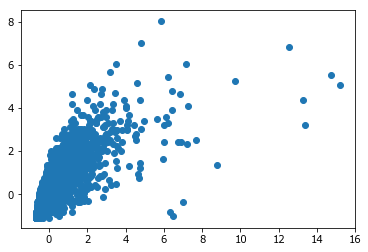

In [32]:
plt.scatter(s_s[:,1],s_s[:,0])


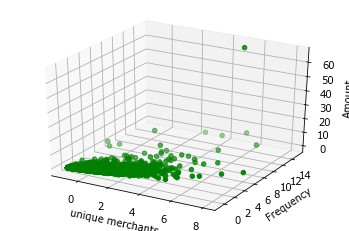

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(s_s[:,0],s_s[:,1],s_s[:,2],marker='o',c=color_map[3])
ax.set_xlabel("unique merchants")
ax.set_ylabel("Frequency")
ax.set_zlabel("Amount")
plt.show()

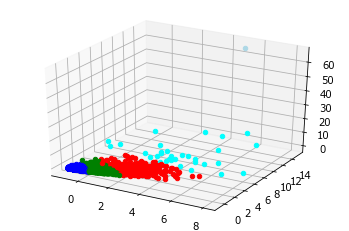

In [34]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(s_s)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
for x in range(len(s_s)):
    ax.scatter(s_s[x][0],s_s[x][1],s_s[x][2],c=color_map[labels[x]])
#for me I would have used some 5 or 6 clusters lets see how could we find the optimal solution



In [45]:
c_range = range( 1, 30 )
error = []
for num_clusters in c_range:
  clusters = KMeans( num_clusters )
  clusters.fit( s_s )
  error.append( clusters.inertia_ )


In [50]:
test =pd.DataFrame([c_range,error])

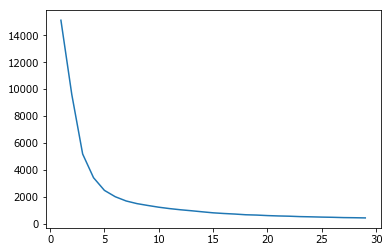

In [51]:
plt.plot(c_range,error)